<a href="https://colab.research.google.com/github/mikemykhaylov/mat422Coursework/blob/main/4_1_2_Network_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
%pip install numpy seaborn scipy matplotlib ipympl pillow scikit-learn requests sympy torch torchinfo networkx

In [8]:
from google.colab import output

output.enable_custom_widget_manager()

In [9]:
%matplotlib widget

# 3.7: Network Analysis

## Topics of this chapter:
- Graph Modeling
- Spectral Clustering

## Graph Modeling

We can model a network as a graph $G = (V, E)$, where $V$ is the set of nodes and $E$ is the set of edges. We can also represent a graph as an adjacency matrix $A$, where $A_{ij} = 1$ if there is an edge between nodes $i$ and $j$, and $A_{ij} = 0$ otherwise.

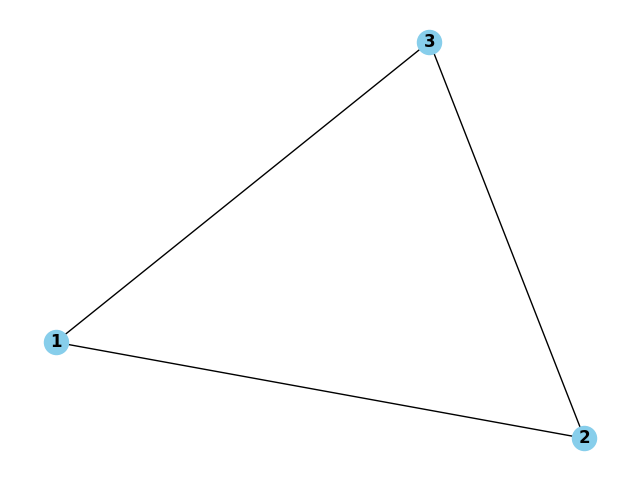

In [10]:
# Python code demonstrating network creation using NetworkX
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_nodes_from([1, 2, 3])
G.add_edges_from([(1, 2), (2, 3), (3, 1)])

# Visualize the network
fig = plt.figure()
nx.draw(G, with_labels=True, node_color='skyblue', font_weight='bold')
plt.show()


A Laplacian matrix $L$ is defined as $L = D - A$, where $D$ is a diagonal matrix with $D_{ii} = \sum_j A_{ij}$.

In [11]:
# Python code demonstrating graph modeling
import numpy as np

# Create an adjacency matrix
adjacency_matrix = np.array([[0, 1, 0], [1, 0, 1], [0, 1, 0]])

# Calculate Laplacian matrix
laplacian_matrix = np.diag(np.sum(adjacency_matrix, axis=1)) - adjacency_matrix

print("Adjacency Matrix:\n", adjacency_matrix)
print("Laplacian Matrix:\n", laplacian_matrix)


Adjacency Matrix:
 [[0 1 0]
 [1 0 1]
 [0 1 0]]
Laplacian Matrix:
 [[ 1 -1  0]
 [-1  2 -1]
 [ 0 -1  1]]


## Spectral Clustering

Spectral clustering is a clustering method that uses the eigenvectors of the Laplacian matrix to cluster data. The algorithm is as follows:

1. Construct the Laplacian matrix $L$.
2. Compute the eigenvectors $v_1, \dots, v_k$ of $L$ corresponding to the $k$ smallest eigenvalues.
3. Let $V$ be the matrix with columns $v_1, \dots, v_k$.
4. For $i = 1, \dots, n$, let $y_i$ be the vector corresponding to the $i$th row of $V$.
5. Cluster the points $(y_i)_{i=1}^n$ using the $k$-means algorithm.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(


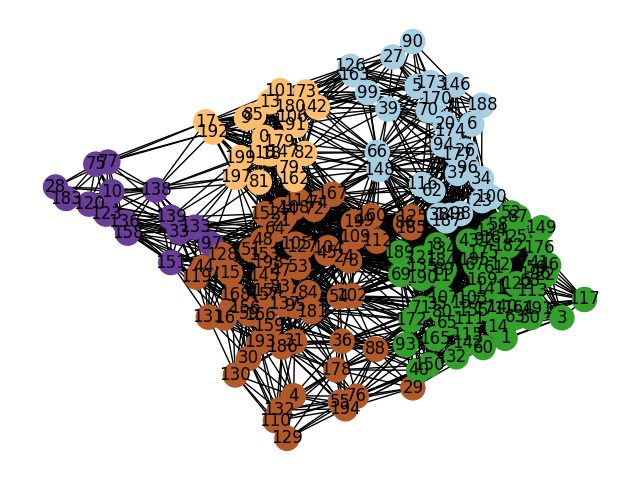

In [12]:
# Python code demonstrating spectral clustering using scikit-learn
from sklearn.cluster import SpectralClustering

# Generate a random planar graph
G_random = nx.random_geometric_graph(200, 0.25)
adjacency_matrix_random = nx.to_numpy_array(G_random)

# Perform spectral clustering
spectral = SpectralClustering(n_clusters=5, affinity='nearest_neighbors')
labels = spectral.fit_predict(adjacency_matrix_random)

# Visualize the clustering results
fig = plt.figure()
nx.draw(G_random, node_color=labels, cmap=plt.cm.Paired, with_labels=True)
plt.show()